# Forest Cover Type Classification

----
### Table of Contents

- [Importing required libraries](#Library-Imports)
- [Reading the data](#Read-Data)
    - [Exploring the data](#Data-Exploration)
    - [Dropping Outliers and Duplicates](#Drop-Outliers-and-Duplicates)
    - [Target Imbalance](#Target-Imbalance)
    - [Grouping Target Classes](#Group-Target-Classes)
- [Feature Engineering](#Feature-Engineering)
- [Drop Columns](#Drop-Columns)
- [Correlation Table](#Correlation-Table)
- [Pair Plot](#Pair-Plot)
- [Splitting the data](#Data-Splitting)
- [Training and Validation (Subset)](#Training-and-Validation-(Subset))
    - [1. K-Nearest Neighbors](#1.-K-Nearest-Neighbors-(Subset))
    - [2. Logistic Regression](#2.-Logistic-Regression-(Subset))
    - [3. Decision Tree](#3.-Decision-Tree-(Subset))
    - [4. Random Forest](#4.-Random-Forest-(Subset))
    - [5. Extra Trees](#5.-Extra-Trees-(Subset))
    - [6. Gaussian Naive Bayes](#6.-Gaussian-Naive-Bayes-(Subset))
    - [7. Bernoulli Naive Bayes](#7.-Bernoulli-Naive-Bayes-(Subset))
    - [8. Gradient Boosting](#8.-Gradient-Boosting-(Subset))
    - [9. Support Vector Machine](#9.-Support-Vector-Machine-(Subset))
    - [OneVsRest Classifier](#OneVsRest-(Subset))
- [Training and Validation (All Data)](#Training-and-Validation-(All-data))
    - [1. K-Nearest Neighbour](#1.-K-Nearest-Neighbors)
    - [2. Logistic Regression](#2.-Logistic-Regression)
    - [3. Decision Tree](#3.-Decision-Tree)
    - [4. Random Forest](#4.-Random-Forest)
    - [5. Extra Trees](#5.-Extra-Trees)
    - [6. Support Vector Machine](#6.-Support-Vector-Machine)
    - [OneVsRest Classifier](#OneVsRest)
- [Hyper Parameter Tuning](#Hyper-Parameter-Tuning)
- [Final Model Testing](#Final-Model-Testing)
-----

#### Library Imports

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from scipy import stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve

#### Read Data

In [2]:
# for laptop
# engine = create_engine("sqlite:///D:/sdaia-t5-bootcamp/Projects/Classification Project/Data/cover_type.db")

# for pc
engine = create_engine("sqlite:///C:/Users/Abdullah/Documents/sdaia-t5-bootcamp/Projects/Classification Project/Data/cover_type.db")

cover_type_df = pd.read_sql('select * from cover_type_table', con=engine)

#### Data Exploration

In [3]:
cover_type_df.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   
5       2579     132      6                               300   
6       2606      45      7                               270   
7       2605      49      4                               234   
8       2617      45      9                               240   
9       2612      59     10                               247   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   
5                             -15                               67   
6                               5                              633   
7                               7                              573   
8                              56                              666   
9                              11                              636   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   
5            230             237            140   
6            222             225            138   
7            222             230            144   
8            223             221            133   
9            228             219            124   

   Horizontal_Distance_To_Fire_Points  ...  Catamount_Rock_Soil_Type  \
0                                6279  ...                         0   
1                                6225  ...                         0   
2                                6121  ...                         0   
3                                6211  ...                         0   
4                                6172  ...                         0   
5                                6031  ...                         0   
6                                6256  ...                         0   
7                                6228  ...                         0   
8                                6244  ...                         0   
9                                6230  ...                         0   

   Leighcan_Catamount_Rock_Soil_Type  Cryorthents_Soil_Type  \
0                                  0                      0   
1                                  0                      0   
2                                  0                      0   
3                                  0                      0   
4                                  0                      0   
5                                  0                      0   
6                                  0                      0   
7                                  0                      0   
8                                  0                      0   
9                                  0                      0   

   Cryumbrepts_Soil_Type  Bross_Soil_Type  Rock_Outcrop_Soil_Type  \
0                      0                0                       0   
1                      0                0                       0   
2                      0                0                       0   
3                      0                0                       0   
4                      0                0                       0   
5                      0                0            

In [4]:
cover_type_df.sample(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
303117       3084     202     13                               192   
90743        2603      41      5                               201   
212819       3201     169      5                               323   
128686       2970      45      9                               404   
24808        2798     146      7                                30   
319746       2984      18     19                               180   
128609       2924     322     20                               270   
349166       2999     310      8                               134   
64977        3057      82     21                               228   
568730       2709     100     18                               182   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
303117                              32                              390   
90743                               28                              361   
212819                              82                             1983   
128686                              57                             3568   
24808                                0                             4897   
319746                             -19                             1302   
128609                              70                             5197   
349166                              -3                             2700   
64977                               75                             3990   
568730                              56                             2001   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
303117            213             251            170   
90743             221             228            143   
212819            224             242            153   
128686            223             221            133   
24808             230             239            142   
319746            201             197            127   
128609            165             215            188   
349166            197             234            177   
64977             243             198             75   
568730            246             213             89   

        Horizontal_Distance_To_Fire_Points  ...  Catamount_Rock_Soil_Type  \
303117                                 738  ...                         0   
90743                                 1475  ...                         0   
212819                                2805  ...                         0   
128686                                1670  ...                         0   
24808                                 4700  ...                         0   
319746                                1140  ...                         0   
128609                                 618  ...                         0   
349166                                2323  ...                         0   
64977                                 5125  ...                         0   
568730                                 918  ...                         0   

        Leighcan_Catamount_Rock_Soil_Type  Cryorthents_Soil_Type  \
303117                                  0                      0   
90743                                   0                      0   
212819                                  0                      0   
128686                                  0                      0   
24808                                   0                      0   
319746                                  0                      0   
128609                                  0                      0   
349166                                  0                      0   
64977                                   0                      0   
568730                                  0                      0   

        Cryumbrepts_Soil_Type  Bross_Soil_Type  Rock_Outcrop_Soil_Type  \
303117                      0                0                       0   
90743                       0                0   

In [5]:
cover_type_df.tail(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
581002       2419     168     25                               108   
581003       2415     161     25                                95   
581004       2410     158     24                                90   
581005       2405     159     22                                90   
581006       2401     157     21                                90   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
581002                              33                              124   
581003                              29                              120   
581004                              24                              120   
581005                              19                              120   
581006                              15                              120   
581007                              17                              108   
581008                              12                               95   
581009                               7                               90   
581010                               5                               90   
581011                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
581002            230             240            126   
581003            236             237            116   
581004            238             236            115   
581005            237             238            119   
581006            238             238            119   
581007            240             237            118   
581008            240             237            119   
581009            236             241            130   
581010            230             245            143   
581011            231             244            141   

        Horizontal_Distance_To_Fire_Points  ...  Catamount_Rock_Soil_Type  \
581002                                 812  ...                         0   
581003                                 815  ...                         0   
581004                                 819  ...                         0   
581005                                 824  ...                         0   
581006                                 830  ...                         0   
581007                                 837  ...                         0   
581008                                 845  ...                         0   
581009                                 854  ...                         0   
581010                                 864  ...                         0   
581011                                 875  ...                         0   

        Leighcan_Catamount_Rock_Soil_Type  Cryorthents_Soil_Type  \
581002                                  0                      0   
581003                                  0                      0   
581004                                  0                      0   
581005                                  0                      0   
581006                                  0                      0   
581007                                  0                      0   
581008                                  0                      0   
581009                                  0                      0   
581010                                  0                      0   
581011                                  0                      0   

        Cryumbrepts_Soil_Type  Bross_Soil_Type  Rock_Outcrop_Soil_Type  \
581002                      0                0                       0   
581003                      0                0   

In [6]:
cover_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   Elevation                             581012 non-null  int64
 1   Aspect                                581012 non-null  int64
 2   Slope                                 581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology      581012 non-null  int64
 4   Vertical_Distance_To_Hydrology        581012 non-null  int64
 5   Horizontal_Distance_To_Roadways       581012 non-null  int64
 6   Hillshade_9am                         581012 non-null  int64
 7   Hillshade_Noon                        581012 non-null  int64
 8   Hillshade_3pm                         581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points    581012 non-null  int64
 10  Rawah_Wilderness_Area                 581012 non-null  int64
 11  Neota_Wilderness_Area     

#### Drop Outliers and Duplicates

Calulate the z-score of all values in each column and take the absolute value of it, if its greater than 3 then it is dropped.

In [3]:
num_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']

In [4]:
cover_type_df = cover_type_df[(np.abs(stats.zscore(cover_type_df[num_cols])) < 3).all(axis=1)].reset_index(drop=True)

In [5]:
cover_type_df = cover_type_df.drop_duplicates().reset_index(drop=True)

#### Target Imbalance

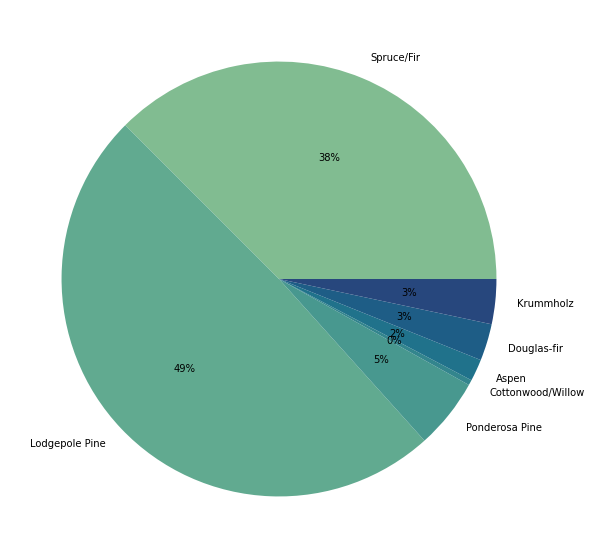

In [111]:
cov_type_count = cover_type_df['Forest_Cover_Type'].value_counts().sort_index()
cov_type_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
colors = sns.color_palette("crest", n_colors=7)

plt.figure(figsize=[10, 10])
plt.pie(cov_type_count, labels=cov_type_names, colors=colors, autopct='%.0f%%');
plt.savefig('images/target_imbalance_pie_chart.png', bbox_inches='tight')

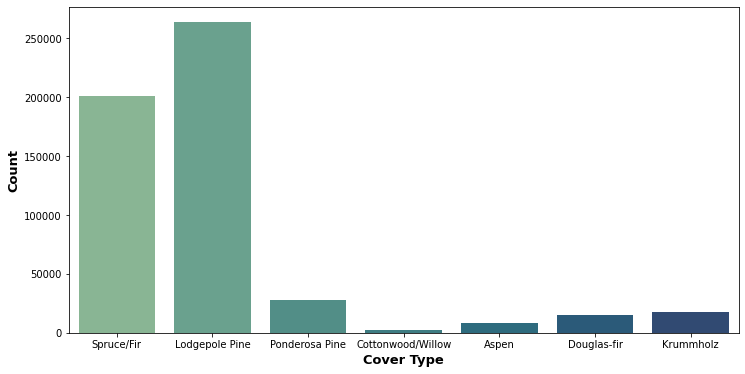

In [77]:
cov_type_count = cover_type_df['Forest_Cover_Type'].value_counts().sort_index()
cov_type_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

plt.figure(figsize=[12, 6])
sns.barplot(x=cov_type_names, y=cov_type_count, palette=sns.color_palette("crest", n_colors=7))
plt.xlabel('Cover Type', fontweight='bold', fontsize=13)
plt.ylabel('Count', fontweight='bold', fontsize=13);

The target column `Forest_Cover_Type` has **7** classes that are highly imbalanced.

#### Group Target Classes

To reduce the imbalance, the classes from **3** to **7** are combined into a single class.

In [6]:
cover_type_group_df = cover_type_df.copy()

In [7]:
cover_type_group_df['Forest_Cover_Type'] = cover_type_df['Forest_Cover_Type'].apply(lambda x: 3 if (x > 2) else x)

In [8]:
cover_type_group_df

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2886     151     11                               371   
1            2503     157      4                                67   
2            2495      51      7                                42   
3            2517      72      7                                85   
4            2504       0      4                                95   
...           ...     ...    ...                               ...   
536426       2396     153     20                                85   
536427       2391     152     19                                67   
536428       2386     159     17                                60   
536429       2384     170     15                                60   
536430       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   26                             5253   
1                                    4                              674   
2                                    2                              752   
3                                    6                              595   
4                                    5                              691   
...                                ...                              ...   
536426                              17                              108   
536427                              12                               95   
536428                               7                               90   
536429                               5                               90   
536430                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 234             240            136   
1                 224             240            151   
2                 224             225            137   
3                 228             227            133   
4                 214             232            156   
...               ...             ...            ...   
536426            240             237            118   
536427            240             237            119   
536428            236             241            130   
536429            230             245            143   
536430            231             244            141   

        Horizontal_Distance_To_Fire_Points  ...  Catamount_Rock_Soil_Type  \
0                                     4051  ...                         0   
1                                     5600  ...                         0   
2                                     5576  ...                         0   
3                                     5607  ...                         0   
4                                     5572  ...                         0   
...                                    ...  ...                       ...   
536426                                 837  ...                         0   
536427                                 845  ...                         0   
536428                                 854  ...                         0   
536429                                 864  ...                         0   
536430                                 875  ...                         0   

        Leighcan_Catamount_Rock_Soil_Type  Cryorthents_Soil_Type  \
0                                       0                      0   
1                                       0                      0   
2                                       0                      0   
3                                       0                      0   
4                                       0                      0   
...                                   ...                    ...   
536426                                  0                      0   
536427                                  0                      0   
536428                                  0               

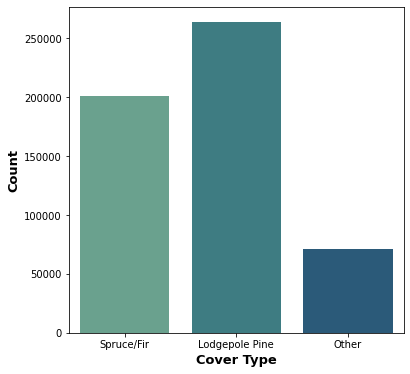

In [76]:
cov_type_count = cover_type_group_df['Forest_Cover_Type'].value_counts().sort_index()



plt.figure(figsize=[6, 6])
sns.barplot(x=['Spruce/Fir', 'Lodgepole Pine', 'Other'], y=cov_type_count, palette=sns.color_palette("crest", n_colors=3))
plt.xlabel('Cover Type', fontweight='bold', fontsize=13)
plt.ylabel('Count', fontweight='bold', fontsize=13);

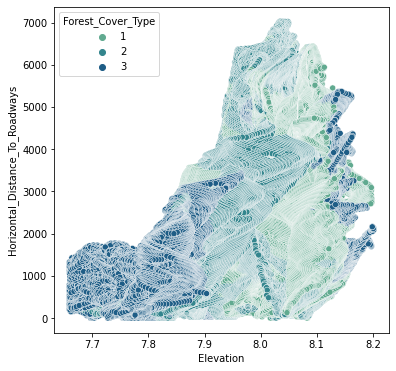

In [80]:
plt.figure(figsize=[6, 6])
sns.scatterplot(x=cover_type_group_df['Elevation'], y=cover_type_group_df['Horizontal_Distance_To_Roadways'], data=cover_type_group_df, hue=cover_type_group_df['Forest_Cover_Type'], palette=sns.color_palette("crest", n_colors=3));

#### Feature Engineering

Take Log of `Elevation`

In [9]:
cover_type_group_df['Elevation'] = cover_type_group_df['Elevation'].apply(lambda x: np.log(x))

Take Log of `Aspect`

In [10]:
cover_type_group_df['Aspect'] = cover_type_group_df['Aspect'].apply(lambda x: np.log(x + 1))

#### Drop Columns

In [11]:
to_be_dropped = ['Hillshade_9am', 'Hillshade_3pm',]
cover_type_group_df.drop(to_be_dropped, axis=1, inplace=True)

#### Correlation Table

In [12]:
cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Hillshade_Noon',
        'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Forest_Cover_Type']

cover_type_group_df[cols].corr()

Elevation    Aspect     Slope  \
Elevation                            1.000000  0.019661 -0.194066   
Aspect                               0.019661  1.000000  0.075809   
Slope                               -0.194066  0.075809  1.000000   
Horizontal_Distance_To_Hydrology     0.274942 -0.004146 -0.005503   
Vertical_Distance_To_Hydrology       0.066986  0.033456  0.260347   
Hillshade_Noon                       0.154909  0.420372 -0.448541   
Horizontal_Distance_To_Roadways      0.350012  0.025938 -0.178380   
Horizontal_Distance_To_Fire_Points   0.161242 -0.086737 -0.142009   
Forest_Cover_Type                   -0.544733  0.039237  0.155080   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.274942   
Aspect                                                     -0.004146   
Slope                                                      -0.005503   
Horizontal_Distance_To_Hydrology                            1.000000   
Vertical_Distance_To_Hydrology                              0.563377   
Hillshade_Noon                                              0.028805   
Horizontal_Distance_To_Roadways                             0.057067   
Horizontal_Distance_To_Fire_Points                          0.070468   
Forest_Cover_Type                                          -0.041577   

                                    Vertical_Distance_To_Hydrology  \
Elevation                                                 0.066986   
Aspect                                                    0.033456   
Slope                                                     0.260347   
Horizontal_Distance_To_Hydrology                          0.563377   
Vertical_Distance_To_Hydrology                            1.000000   
Hillshade_Noon                                           -0.095814   
Horizontal_Distance_To_Roadways                          -0.032130   
Horizontal_Distance_To_Fire_Points                       -0.046783   
Forest_Cover_Type                                         0.084647   

                                    Hillshade_Noon  \
Elevation                                 0.154909   
Aspect                                    0.420372   
Slope                                    -0.448541   
Horizontal_Distance_To_Hydrology          0.028805   
Vertical_Distance_To_Hydrology           -0.095814   
Hillshade_Noon                            1.000000   
Horizontal_Distance_To_Roadways           0.159100   
Horizontal_Distance_To_Fire_Points        0.015248   
Forest_Cover_Type                        -0.031588   

                                    Horizontal_Distance_To_Roadways  \
Elevation                                                  0.350012   
Aspect                                                     0.025938   
Slope                                                     -0.178380   
Horizontal_Distance_To_Hydrology                           0.057067   
Vertical_Distance_To_Hydrology                            -0.032130   
Hillshade_Noon                                             0.159100   
Horizontal_Distance_To_Roadways                            1.000000   
Horizontal_Distance_To_Fire_Points                         0.306529   
Forest_Cover_Type                                         -0.201185   

                                    Horizontal_Distance_To_Fire_Points  \
Elevation                                                     0.161242   
Aspect                                                       -0.086737   
Slope                                                        -0.142009   
Horizontal_Distance_To_Hydrology                              0.070468   
Vertical_Distance_To_Hydrology                               -0.046783   
Hillshade_Noon                                                0.015248   
Horizontal_Distance_To_Roadways                               0.306529   
Horizontal_Distance_To_Fire_Points                            1.000000   
Fores

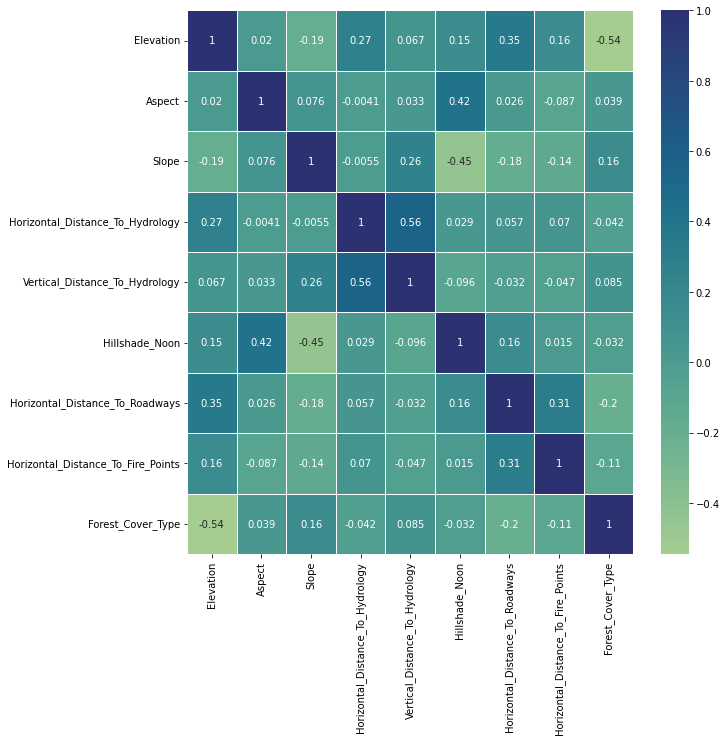

In [19]:
plt.figure(figsize=[10, 10])
sns.heatmap(cover_type_group_df[cols].corr(), annot=True, linewidth=.7, cmap=sns.color_palette("crest", as_cmap=True));

#### Pair Plot

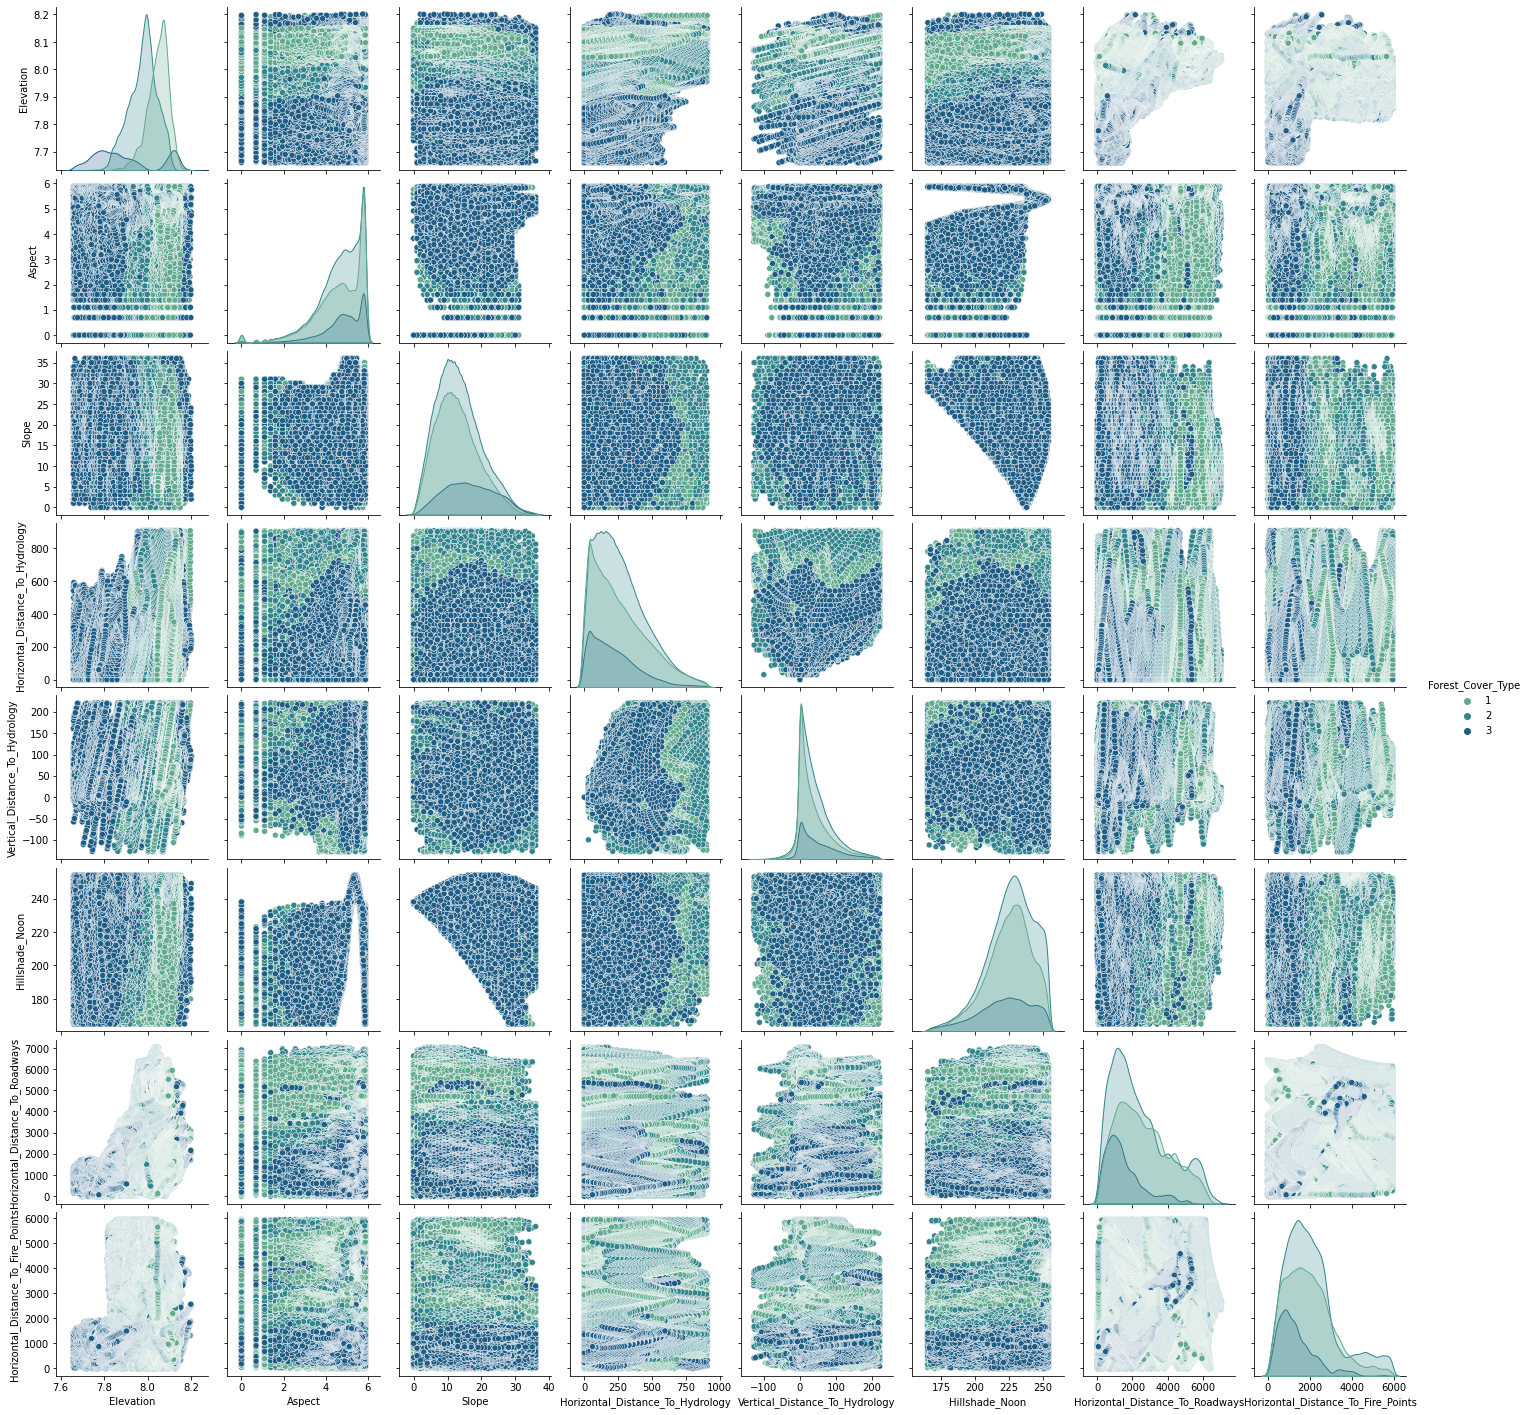

In [20]:
sns.pairplot(cover_type_group_df[cols], hue='Forest_Cover_Type', palette=sns.color_palette("crest", n_colors=3))
plt.savefig('images/pair_plot.png', bbox_inches='tight')

#### Data Splitting

Split a sample of the data into **90%**, **5%**, and **5%** splits for **training**, **validation**, and **testing** respectively.

In [13]:
sub_cover_type_df = cover_type_group_df.sample(100000)

In [14]:
X_sub = sub_cover_type_df.drop('Forest_Cover_Type', axis=1)
y_sub = sub_cover_type_df['Forest_Cover_Type']

In [15]:
X_train_sub, X_rem_sub, y_train_sub, y_rem_sub = train_test_split(X_sub, y_sub, train_size=0.90, random_state=41, shuffle=True)
X_valid_sub, X_test_sub, y_valid_sub, y_test_sub = train_test_split(X_rem_sub, y_rem_sub, test_size=0.5, random_state=41, shuffle=True)

Split the data into **95%**, **2.5%**, and **2.5%** splits for **training**, **validation**, and **testing** respectively.

In [16]:
X = cover_type_group_df.drop('Forest_Cover_Type', axis=1)
y = cover_type_group_df['Forest_Cover_Type']

In [17]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.95, random_state=42, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, shuffle=True)

#### Model metrics

Calculate accuracy, f1, recall, precision, and error rate from the passed true values and predicted values.

In [18]:
def print_all_metrics(y, y_pred):
    print(f'Accuracy:\t\t{accuracy_score(y, y_pred) * 100}')
    print(f'F1 Score:\t\t{f1_score(y, y_pred, average="weighted") * 100}')
    print(f'Recall Score:\t\t{recall_score(y, y_pred, average="weighted") * 100}')
    print(f'Precision Score:\t{precision_score(y, y_pred, average="weighted") * 100}')
    print(f'Error Rate:\t\t{(1 - accuracy_score(y, y_pred)) * 100}')

Plot a confusion matrix of the passed true values and predicted values.

In [112]:
def plot_confusion_matrix(y, y_pred, model_name):
    sns.heatmap(confusion_matrix(y, y_pred), cmap=sns.color_palette("crest", as_cmap=True), annot=True, linewidth=.5, fmt='n', xticklabels=['Spruce/Fir', 'Lodgepole Pine', 'Other'], yticklabels=['Spruce/Fir', 'Lodgepole Pine', 'Other'])
    plt.xlabel('Predicted types', fontweight='bold')
    plt.ylabel('Actual types', fontweight='bold')
    plt.title(model_name, fontweight='bold', fontsize=15);
    plt.savefig('images/confusion_matrix.png', transparent=True, bbox_inches='tight')

#### Training and Validation (Subset)

###### 1. K-Nearest Neighbors (Subset)

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sub.values, y_train_sub.values)

print('Training')
print_all_metrics(y_train_sub, knn.predict(X_train_sub.values))
print('\nValidation')
print_all_metrics(y_valid_sub, knn.predict(X_valid_sub.values))

Training
Accuracy:		82.88333333333333
F1 Score:		82.72595517624852
Recall Score:		82.88333333333333
Precision Score:	82.92437433548766
Error Rate:		17.116666666666667

Validation
Accuracy:		71.61999999999999
F1 Score:		71.31247041954445
Recall Score:		71.61999999999999
Precision Score:	71.4956671100655
Error Rate:		28.380000000000006


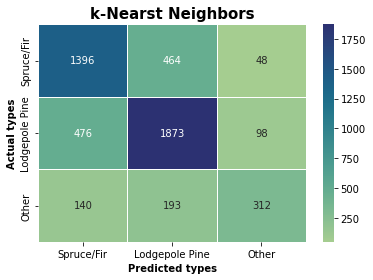

In [29]:
plot_confusion_matrix(y_valid_sub, knn.predict(X_valid_sub.values), 'k-Nearst Neighbors')

###### 2. Logistic Regression (Subset)

In [94]:
scaler = StandardScaler()
X_train_sub_scaled = scaler.fit_transform(X_train_sub)
X_valid_sub_scaled = scaler.fit_transform(X_valid_sub)

In [95]:
log_reg = LogisticRegression(C=100, max_iter=3000)
log_reg.fit(X_train_sub_scaled, y_train_sub.values)

print('Training')
print_all_metrics(y_train_sub, log_reg.predict(X_train_sub_scaled))
print('\nValidation')
print_all_metrics(y_valid_sub, log_reg.predict(X_valid_sub_scaled))

Training
Accuracy:		71.66555555555556
F1 Score:		71.6242978994569
Recall Score:		71.66555555555556
Precision Score:	71.85343949559602
Error Rate:		28.33444444444444

Validation
Accuracy:		71.78
F1 Score:		71.73040015666308
Recall Score:		71.78
Precision Score:	71.99562736164398
Error Rate:		28.22


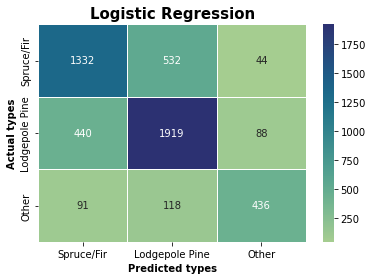

In [32]:
plot_confusion_matrix(y_valid_sub, log_reg.predict(X_valid_sub_scaled), 'Logistic Regression')

###### 3. Decision Tree (Subset)

In [97]:
decisiontree = DecisionTreeClassifier(max_depth=4)
decisiontree.fit(X_train_sub.values, y_train_sub.values)

print('Training')
print_all_metrics(y_train_sub, decisiontree.predict(X_train_sub.values))
print('\nValidation')
print_all_metrics(y_valid_sub, decisiontree.predict(X_valid_sub.values))

Training
Accuracy:		68.88888888888889
F1 Score:		68.85248422378764
Recall Score:		68.88888888888889
Precision Score:	68.99427170195686
Error Rate:		31.11111111111111

Validation
Accuracy:		69.39999999999999
F1 Score:		69.35581244120374
Recall Score:		69.39999999999999
Precision Score:	69.51162143453217
Error Rate:		30.600000000000005


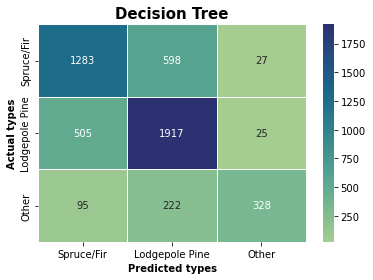

In [34]:
plot_confusion_matrix(y_valid_sub, decisiontree.predict(X_valid_sub.values), 'Decision Tree')

###### 4. Random Forest (Subset)

In [98]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train_sub.values, y_train_sub.values)

print('Training')
print_all_metrics(y_train_sub, randomforest.predict(X_train_sub.values))
print('\nValidation')
print_all_metrics(y_valid_sub, randomforest.predict(X_valid_sub.values))

Training
Accuracy:		100.0
F1 Score:		100.0
Recall Score:		100.0
Precision Score:	100.0
Error Rate:		0.0

Validation
Accuracy:		92.17999999999999
F1 Score:		92.17101177688204
Recall Score:		92.17999999999999
Precision Score:	92.24795293570224
Error Rate:		7.820000000000005


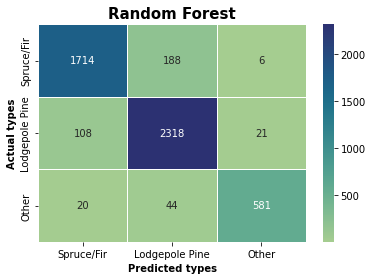

In [36]:
plot_confusion_matrix(y_valid_sub, randomforest.predict(X_valid_sub.values), 'Random Forest')

###### 5. Extra Trees (Subset)

In [99]:
extratrees = ExtraTreesClassifier()
extratrees.fit(X_train_sub.values, y_train_sub.values)

print('Training')
print_all_metrics(y_train_sub, extratrees.predict(X_train_sub.values))
print('\nValidation')
print_all_metrics(y_valid_sub, extratrees.predict(X_valid_sub.values))

Training
Accuracy:		100.0
F1 Score:		100.0
Recall Score:		100.0
Precision Score:	100.0
Error Rate:		0.0

Validation
Accuracy:		92.9
F1 Score:		92.89018150165673
Recall Score:		92.9
Precision Score:	92.95045893432228
Error Rate:		7.099999999999995


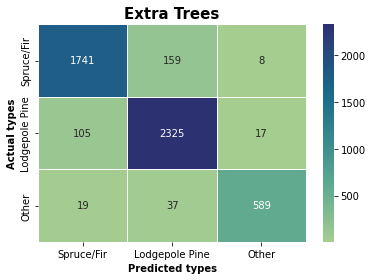

In [38]:
plot_confusion_matrix(y_valid_sub, extratrees.predict(X_valid_sub.values), 'Extra Trees')

###### 6. Gaussian Naive Bayes (Subset)

In [39]:
gnb = GaussianNB()
gnb.fit(X_train_sub.values, y_train_sub.values)

print('Training')
print_all_metrics(y_train_sub, gnb.predict(X_train_sub.values))
print('\nValidation')
print_all_metrics(y_valid_sub, gnb.predict(X_valid_sub.values))

Training
Accuracy:		57.20444444444445
F1 Score:		53.739486174241144
Recall Score:		57.20444444444445
Precision Score:	66.89314291281408
Error Rate:		42.79555555555555

Validation
Accuracy:		56.879999999999995
F1 Score:		53.48714340165168
Recall Score:		56.879999999999995
Precision Score:	65.71198326458642
Error Rate:		43.120000000000005


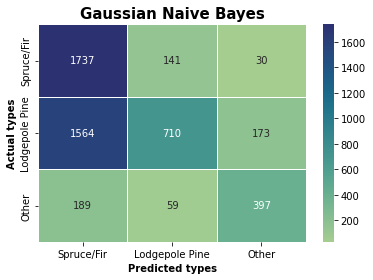

In [40]:
plot_confusion_matrix(y_valid_sub, gnb.predict(X_valid_sub.values), 'Gaussian Naive Bayes')

###### 7. Bernoulli Naive Bayes (Subset)

In [41]:
bnb = BernoulliNB()
bnb.fit(X_train_sub.values, y_train_sub.values)

print('Training')
print_all_metrics(y_train_sub, bnb.predict(X_train_sub.values))
print('\nValidation')
print_all_metrics(y_valid_sub, bnb.predict(X_valid_sub.values))

Training
Accuracy:		65.62444444444444
F1 Score:		65.04388074670946
Recall Score:		65.62444444444444
Precision Score:	65.57235090385768
Error Rate:		34.37555555555556

Validation
Accuracy:		65.25999999999999
F1 Score:		64.75242596668284
Recall Score:		65.25999999999999
Precision Score:	65.29017023323756
Error Rate:		34.74


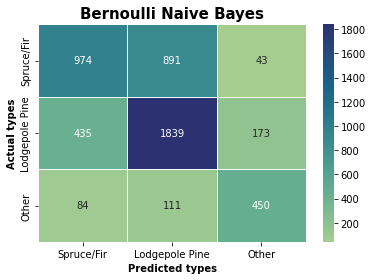

In [42]:
plot_confusion_matrix(y_valid_sub, bnb.predict(X_valid_sub.values), 'Bernoulli Naive Bayes')

###### 8. Gradient Boosting (Subset)

In [43]:
gbm = xgb.XGBClassifier(n_estimators=10000, max_depth=4, objective='multi:softmax', learning_rate=.5, subsample=.8, min_child_weight=3, colsample_bytree=.8)
eval_set = [(X_train_sub, y_train_sub), (X_valid_sub, y_valid_sub)]
model_fit = gbm.fit(X_train_sub, y_train_sub, eval_set=eval_set, eval_metric='mlogloss', early_stopping_rounds=50, verbose=False)

print('Training')
print_all_metrics(y_train_sub, gbm.predict(X_train_sub, ntree_limit=gbm.best_ntree_limit))
print('\nValidation')
print_all_metrics(y_valid_sub, gbm.predict(X_valid_sub, ntree_limit=gbm.best_ntree_limit))

c:\users\abdullah\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training


c:\users\abdullah\appdata\local\programs\python\python39\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


Accuracy:		99.08222222222223
F1 Score:		99.08193974845483
Recall Score:		99.08222222222223
Precision Score:	99.08268762242957
Error Rate:		0.9177777777777729

Validation
Accuracy:		91.02
F1 Score:		91.02080279317553
Recall Score:		91.02
Precision Score:	91.0475942253374
Error Rate:		8.979999999999999


c:\users\abdullah\appdata\local\programs\python\python39\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


c:\users\abdullah\appdata\local\programs\python\python39\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


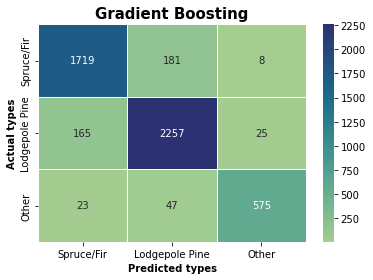

In [44]:
plot_confusion_matrix(y_valid_sub, gbm.predict(X_valid_sub, ntree_limit=gbm.best_ntree_limit), 'Gradient Boosting')

###### 9. Support Vector Machine (Subset)

In [45]:
svm_clf = SVC()
svm_clf.fit(X_train_sub.values, y_train_sub.values)

print('Training')
print_all_metrics(y_train_sub, svm_clf.predict(X_train_sub.values))
print('\nValidation')
print_all_metrics(y_valid_sub, svm_clf.predict(X_valid_sub.values))

Training
Accuracy:		52.70444444444444
F1 Score:		46.38342863772506
Recall Score:		52.70444444444444
Precision Score:	46.42793566126041
Error Rate:		47.29555555555556

Validation


c:\users\abdullah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:		53.82
F1 Score:		47.54456677504944
Recall Score:		53.82
Precision Score:	48.13886259148556
Error Rate:		46.18


c:\users\abdullah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


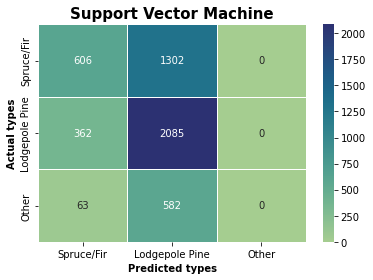

In [46]:
plot_confusion_matrix(y_valid_sub, svm_clf.predict(X_valid_sub.values), 'Support Vector Machine')

###### OneVsRest (Subset)

In [47]:
models = {'K-Nearst Neighbors': 'KNeighborsClassifier(n_neighbors=5)',
          'Logistic Regression': 'LogisticRegression(C=100, max_iter=3000)',
          'Decision Tree': 'DecisionTreeClassifier(max_depth=4)',
          'Random Forest': 'RandomForestClassifier(n_estimators=100)',
          'Extra Trees': 'ExtraTreesClassifier()',
          'Gaussian Naive Bayes': 'GaussianNB()',
          'Bernoulli Naive Bayes': 'BernoulliNB()'}

In [48]:
for name, model in models.items():
    ovr = OneVsRestClassifier(estimator=eval(model), n_jobs=-1)
    ovr.fit(X_train_sub.values, y_train_sub.values)
    y_pred_sub = ovr.predict(X_valid_sub.values)
    
    print(name, '\nTrain Scores:')
    print_all_metrics(y_train_sub.values, ovr.predict(X_train_sub.values))
    print('\nValidation Scores:')
    print_all_metrics(y_valid_sub.values, y_pred_sub)
    print('___________________________________________')

K-Nearst Neighbors 
Train Scores:
Accuracy:		83.0611111111111
F1 Score:		83.03989340571673
Recall Score:		83.0611111111111
Precision Score:	83.15138128827434
Error Rate:		16.938888888888894

Validation Scores:
Accuracy:		71.78
F1 Score:		71.72747490889016
Recall Score:		71.78
Precision Score:	71.75383994015692
Error Rate:		28.22
___________________________________________
Logistic Regression 
Train Scores:
Accuracy:		66.37333333333333
F1 Score:		65.84607704545623
Recall Score:		66.37333333333333
Precision Score:	66.63759100969217
Error Rate:		33.62666666666667

Validation Scores:
Accuracy:		65.75999999999999
F1 Score:		65.19391869434489
Recall Score:		65.75999999999999
Precision Score:	66.12253818228936
Error Rate:		34.24
___________________________________________
Decision Tree 
Train Scores:
Accuracy:		71.98777777777778
F1 Score:		71.60788309186051
Recall Score:		71.98777777777778
Precision Score:	72.9474793130457
Error Rate:		28.012222222222228

Validation Scores:
Accuracy:		71.66
F

#### Training and Validation (All data)

###### 1. K-Nearest Neighbors

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.values, y_train.values)

print('Training')
print_all_metrics(y_train, knn.predict(X_train.values))
print('\nValidation')
print_all_metrics(y_valid, knn.predict(X_valid.values))

Training


KeyboardInterrupt: 

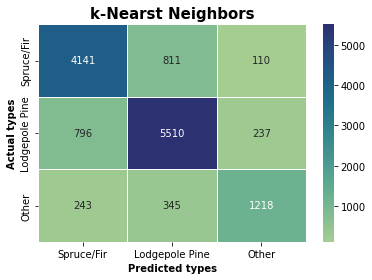

In [50]:
plot_confusion_matrix(y_valid, knn.predict(X_valid.values), 'k-Nearst Neighbors')

###### 2. Logistic Regression

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)

In [25]:
log_reg = LogisticRegression(C=100, max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

print('Training')
print_all_metrics(y_train, log_reg.predict(X_train_scaled))
print('\nValidation')
print_all_metrics(y_valid, log_reg.predict(X_valid_scaled))

Training
Accuracy:		73.30698633658353
F1 Score:		73.23847968357461
Recall Score:		73.30698633658353
Precision Score:	73.34371751172078
Error Rate:		26.693013663416465

Validation
Accuracy:		73.96912981880546
F1 Score:		73.91166228454713
Recall Score:		73.96912981880546
Precision Score:	73.95230375754433
Error Rate:		26.030870181194544


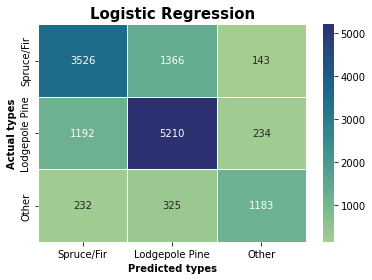

In [23]:
plot_confusion_matrix(y_valid, log_reg.predict(X_valid_scaled), 'Logistic Regression')

###### 3. Decision Tree

In [55]:
decisiontree = DecisionTreeClassifier(max_depth=4)
decisiontree.fit(X_train.values, y_train.values)

print('Training')
print_all_metrics(y_train, decisiontree.predict(X_train.values))
print('\nValidation')
print_all_metrics(y_valid, decisiontree.predict(X_valid.values))

Training
Accuracy:		71.0191539003432
F1 Score:		70.72945913140198
Recall Score:		71.0191539003432
Precision Score:	71.8415865705812
Error Rate:		28.980846099656798

Validation
Accuracy:		70.28558645887703
F1 Score:		69.99552303274443
Recall Score:		70.28558645887703
Precision Score:	71.11473421896245
Error Rate:		29.714413541122966


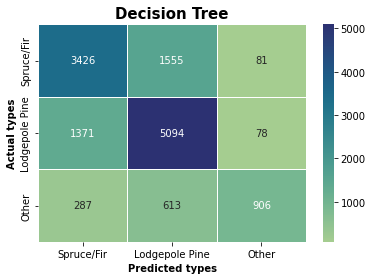

In [56]:
plot_confusion_matrix(y_valid, decisiontree.predict(X_valid.values), 'Decision Tree')

###### 4. Random Forest

In [57]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train.values, y_train.values)

print('Training')
print_all_metrics(y_train, randomforest.predict(X_train.values))
print('\nValidation')
print_all_metrics(y_valid, randomforest.predict(X_valid.values))

Training
Accuracy:		100.0
F1 Score:		100.0
Recall Score:		100.0
Precision Score:	100.0
Error Rate:		0.0

Validation
Accuracy:		96.57743643277907
F1 Score:		96.57593064467258
Recall Score:		96.57743643277907
Precision Score:	96.58505437190888
Error Rate:		3.4225635672209376


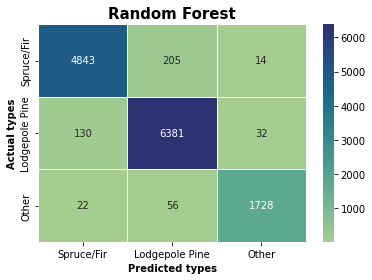

In [58]:
plot_confusion_matrix(y_valid, randomforest.predict(X_valid.values), 'Random Forest')

###### 5. Extra Trees

In [26]:
extratrees = ExtraTreesClassifier(n_estimators=50)
extratrees.fit(X_train.values, y_train.values)

print('Training')
print_all_metrics(y_train, extratrees.predict(X_train.values))
print('\nValidation')
print_all_metrics(y_valid, extratrees.predict(X_valid.values))

Training
Accuracy:		100.0
F1 Score:		100.0
Recall Score:		100.0
Precision Score:	100.0
Error Rate:		0.0

Validation
Accuracy:		96.60726269480277
F1 Score:		96.60621314293351
Recall Score:		96.60726269480277
Precision Score:	96.61026812812507
Error Rate:		3.3927373051972243


In [40]:
extratrees = ExtraTreesClassifier(n_estimators=150, max_features=52)
extratrees.fit(X_train.values, y_train.values)

print('Training')
print_all_metrics(y_train, extratrees.predict(X_train.values))
print('\nValidation')
print_all_metrics(y_valid, extratrees.predict(X_valid.values))

Training
Accuracy:		100.0
F1 Score:		100.0
Recall Score:		100.0
Precision Score:	100.0
Error Rate:		0.0

Validation
Accuracy:		97.88979196182238
F1 Score:		97.88954512377843
Recall Score:		97.88979196182238
Precision Score:	97.89041748747273
Error Rate:		2.110208038177619


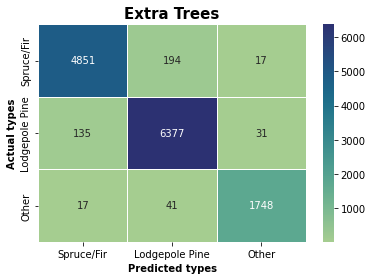

In [60]:
plot_confusion_matrix(y_valid, extratrees.predict(X_valid.values), 'Extra Trees')

###### 6. Support Vector Machine

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train.values, y_train)

print('Training')
print_all_metrics(y_train, svm_clf.predict(X_train.values))
print('\nValidation')
print_all_metrics(y_valid, svm_clf.predict(X_valid.values))

In [ ]:
plot_confusion_matrix(y_valid, svm_clf.predict(X_valid.values), 'Support Vector Machine')

###### OneVsRest

In [61]:
accuracy_scores = {}
models = {'K-Nearst Neighbors': 'KNeighborsClassifier(n_neighbors=5)',
          'Logistic Regression': 'LogisticRegression(C=100, max_iter=3000)',
          'Decision Tree': 'DecisionTreeClassifier(max_depth=4)',
          'Random Forest': 'RandomForestClassifier(n_estimators=100)',
          'Extra Trees': 'ExtraTreesClassifier()',
          'Gaussian Naive Bayes': 'GaussianNB()',
          'Bernoulli Naive Bayes': 'BernoulliNB()'}

In [62]:
for name, model in models.items():
    ovr = OneVsRestClassifier(estimator=eval(model), n_jobs=-1)
    ovr.fit(X_train.values, y_train.values)
    y_pred = ovr.predict(X_valid.values)
    
    print(name, '\nTrain Scores:')
    print_all_metrics(y_train.values, ovr.predict(X_train.values))
    print('\nValidation Scores:')
    print_all_metrics(y_valid.values, y_pred)
    print('___________________________________________')
    
    accuracy_scores[name] = accuracy_score(y_valid, y_pred)

K-Nearst Neighbors 
Train Scores:
Accuracy:		89.5759297814599
F1 Score:		89.57933548760859
Recall Score:		89.5759297814599
Precision Score:	89.60571971385184
Error Rate:		10.424070218540093

Validation Scores:
Accuracy:		81.06032361494296
F1 Score:		81.09069340571033
Recall Score:		81.06032361494296
Precision Score:	81.20625008324825
Error Rate:		18.939676385057048
___________________________________________
Logistic Regression 
Train Scores:
Accuracy:		66.32339695727508
F1 Score:		65.74048779614482
Recall Score:		66.32339695727508
Precision Score:	66.67166965909092
Error Rate:		33.67660304272492

Validation Scores:
Accuracy:		66.24412795466408
F1 Score:		65.70029564440367
Recall Score:		66.24412795466408
Precision Score:	66.73516638588221
Error Rate:		33.75587204533592
___________________________________________
Decision Tree 
Train Scores:
Accuracy:		71.38551320718433
F1 Score:		71.02999625545469
Recall Score:		71.38551320718433
Precision Score:	72.3042362891281
Error Rate:		28.61448

In [101]:
sns.barplot(x=list(accuracy_scores.values()), y=list(accuracy_scores.keys()), palette=sns.color_palette("crest", n_colors=7));

NameError: name 'accuracy_scores' is not defined

#### Hyper Parameter Tuning

From model scores from the figure above, the best model in terms of highest accuracy and least overfit is the **Extra Trees**.

Find best value for `n_estimators`

In [90]:
param_grid = {'n_estimators': list(range(550, 701, 50))}
grid_search_n = GridSearchCV(ExtraTreesClassifier(max_features=52), param_grid, scoring='accuracy', cv=5, n_jobs=6)
grid_search_n.fit(X_train.values, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(max_features=52), n_jobs=6,
             param_grid={'n_estimators': [550, 600, 650, 700]},
             scoring='accuracy')

In [92]:
print('Training')
print_all_metrics(y_train, grid_search_n.predict(X_train.values))
print('\nValidation')
print_all_metrics(y_valid, grid_search_n.predict(X_valid.values))

Training
Accuracy:		100.0
F1 Score:		100.0
Recall Score:		100.0
Precision Score:	100.0
Error Rate:		0.0

Validation
Accuracy:		97.95690105137574
F1 Score:		97.95670330484393
Recall Score:		97.95690105137574
Precision Score:	97.95743252335059
Error Rate:		2.0430989486242668


In [91]:
pd.DataFrame(grid_search_n.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0    1555.581789      9.121763        11.287268        0.044529   
1    1668.663275     12.386448        12.213734        0.032016   
2    1799.907841      9.207684        13.148621        0.049282   
3    1794.563948    154.400954        13.763851        0.109204   

  param_n_estimators                 params  split0_test_score  \
0                550  {'n_estimators': 550}           0.976325   
1                600  {'n_estimators': 600}           0.976521   
2                650  {'n_estimators': 650}           0.976394   
3                700  {'n_estimators': 700}           0.976619   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.977081           0.975746           0.976129           0.976001   
1           0.977051           0.975707           0.976188           0.976011   
2           0.977002           0.975952           0.976364           0.975991   
3           0.976933           0.975854           0.976384           0.975824   

   mean_test_score  std_test_score  rank_test_score  
0         0.976256        0.000453                4  
1         0.976296        0.000461                3  
2         0.976341        0.000378                1  
3         0.976323        0.000432                2

In [93]:
grid_search_n.best_estimator_

ExtraTreesClassifier(max_features=52, n_estimators=650)

In [100]:
ovr_et = OneVsRestClassifier(ExtraTreesClassifier(max_features=52, n_estimators=650))
ovr_et.fit(X_train.values, y_train.values)
y_pred = ovr_et.predict(X_valid.values)

Train Scores:
Accuracy:		100.0
F1 Score:		100.0
Recall Score:		100.0
Precision Score:	100.0
Error Rate:		0.0

Validation Scores:
Accuracy:		97.94198792036389
F1 Score:		97.94174689153401
Recall Score:		97.94198792036389
Precision Score:	97.94229618129832
Error Rate:		2.058012079636118


In [ ]:
print('Train Scores:')
print_all_metrics(y_train.values, ovr_et.predict(X_train.values))
print('\nValidation Scores:')
print_all_metrics(y_valid.values, y_pred)

#### Final Model Testing

In [113]:
X_train_valid = pd.concat([X_train, X_valid])
y_train_valid = pd.concat([y_train, y_valid])

In [114]:
ovr_et_f = OneVsRestClassifier(ExtraTreesClassifier(max_features=52, n_estimators=650))
ovr_et_f.fit(X_train_valid.values, y_train_valid)
y_pred = ovr_et_f.predict(X_test.values)

In [115]:
print_all_metrics(y_test, y_pred)

Accuracy:		97.84505256878681
F1 Score:		97.84496872174432
Recall Score:		97.84505256878681
Precision Score:	97.8450800387249
Error Rate:		2.1549474312131833


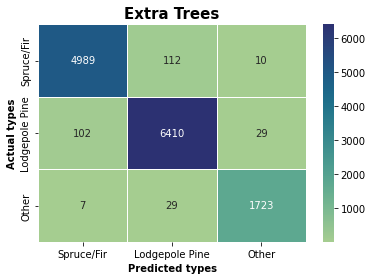

In [116]:
plot_confusion_matrix(y_test, y_pred, 'Extra Trees')

In [119]:
filename = 'model_deployment/model.pkl'
pickle.dump(ovr_et_f, open(filename, 'wb'))